In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [52]:
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # converte object to int
    #df["bank_account"] = df["bank_account"].astype(int)
    #df["bank_account"] = df["bank_account"].astype(str).astype(int)
    #df["bank_account"] = pd.to_numeric(df["bank_account"])
    return df

In [53]:
#Load files into a pandas dataframe
train = wrangle(r"C:\Users\sanus\Desktop\Poland\Train.csv")
test = wrangle(r"C:\Users\sanus\Desktop\Poland\Test.csv")
sample = wrangle(r"C:\Users\sanus\Desktop\Poland\SampleSubmission.csv")
variables = wrangle(r"C:\Users\sanus\Desktop\Poland\VariableDefinitions.csv")

In [54]:
print(train.info())
print(train.shape)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None
(23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [55]:
print(test.info())
print(test.shape)
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB
None
(10086, 12)


,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [56]:
# Check for missing values
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [48]:
train["bank_account"].value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
train['bank_account'] = le.fit_transform(train['bank_account'])
train["bank_account"]

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [71]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [72]:
# Create correlation matrix
correlation = train.select_dtypes("number").drop(columns="bank_account").corr()
correlation

,year,household_size,age_of_respondent
year,1.000000,-0.052264,-0.019330
household_size,-0.052264,1.000000,-0.129729
age_of_respondent,-0.019330,-0.129729,1.000000


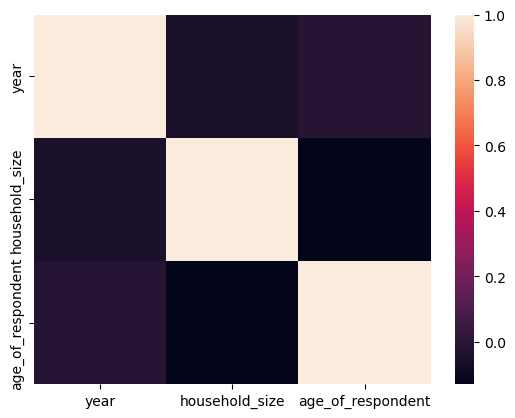

In [73]:
# Plot heatmap of `correlation`
sns.heatmap(correlation);

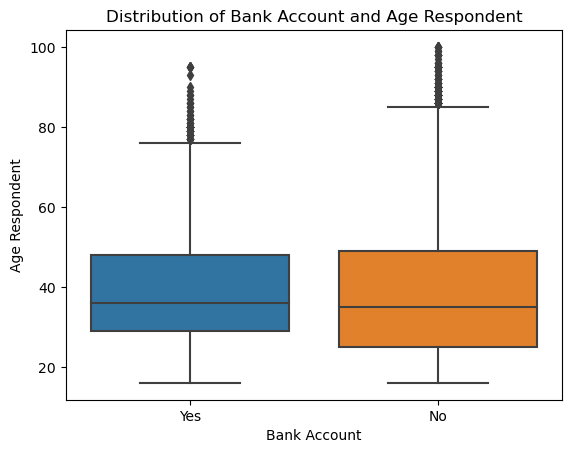

In [57]:
# Create boxplot
sns.boxplot(x="bank_account", y="age_of_respondent", data=train)
# Label axes
plt.xlabel("Bank Account")
plt.ylabel("Age Respondent")
plt.title("Distribution of Bank Account and Age Respondent");

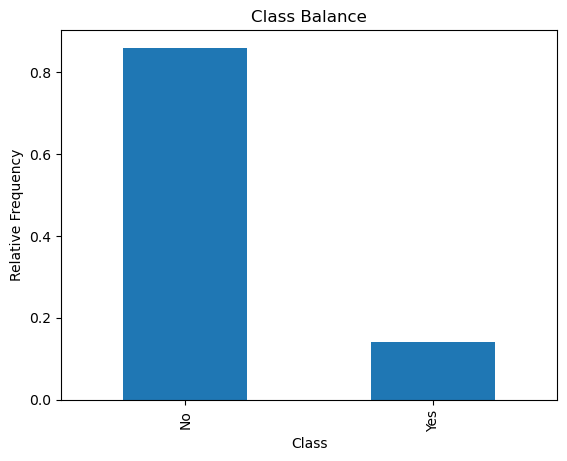

In [59]:
# Plot value counts of `"bank_account"`
train["bank_account"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

In [61]:
majority_class_prop, minority_class_prop = train["bank_account"].value_counts(normalize=True)
print(majority_class_prop, minority_class_prop)

0.859207617752083 0.14079238224791701


In [75]:
# Create pivot table
Education_level_pivot = pd.pivot_table(
    train, index="education_level", values="bank_account", aggfunc=np.mean
).sort_values(by="bank_account")
Education_level_pivot

,bank_account
education_level,
No formal education,0.038981
Primary education,0.085451
Secondary education,0.232773
Other/Dont know/RTA,0.314286
Tertiary education,0.510804
Vocational/Specialised training,0.570361


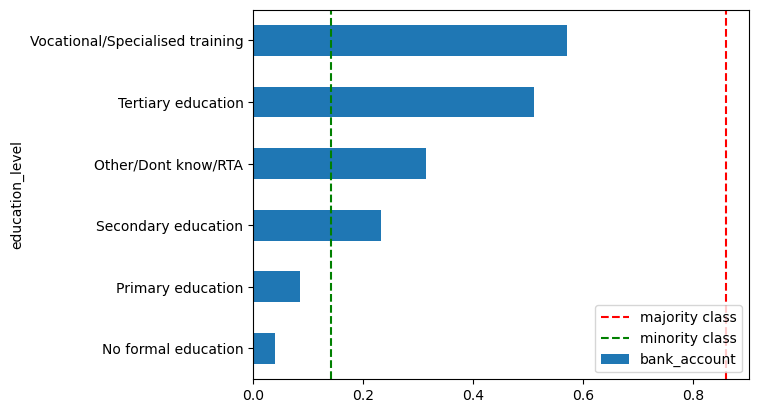

In [76]:
# Plot bar chart of `foundation_pivot`
Education_level_pivot.plot(kind="barh")
plt.axvline(
    majority_class_prop, linestyle="--", color="red", label="majority class"
)
plt.axvline(
    minority_class_prop, linestyle="--", color="green", label="minority class"
)
plt.legend(loc="lower right");

In [78]:
#Split data
target = "bank_account"
X = train.drop(columns=target)
y = train[target]

In [80]:
# Split train_data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (21171, 12)
y_train shape: (21171,)
X_test shape: (2353, 12)
y_test shape: (2353,)


In [81]:
X_train, X_val, y_train, y_val =train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (19053, 12)
y_train shape: (19053,)
X_val shape: (2118, 12)
y_val shape: (2118,)


# Build Model

In [82]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.86


In [83]:
#Iterate
# Build model for LogisticRegression
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=2000)
)
# Fit model to training data
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['country', 'uniqueid', 'location_type',
                                     'cellphone_access', 'gender_of_respondent',
                                     'relationship_with_head', 'marital_status',
                                     'education_level', 'job_type'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [84]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.88
Test Accuracy: 0.89


In [85]:
# Communicate
model.predict(X_train)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [86]:
y_train_pred_proba =model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.16918005 0.83081995]
 [0.86386428 0.13613572]
 [0.96608564 0.03391436]
 [0.40244533 0.59755467]
 [0.93612349 0.06387651]]


In [87]:
features = model.named_steps["onehotencoder"].get_feature_names() 
importances = model.named_steps["logisticregression"].coef_[0]

In [88]:
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

education_level_No formal education    0.167383
education_level_Primary education      0.392008
cellphone_access_No                    0.432939
job_type_Informally employed           0.445123
job_type_Remittance Dependent          0.454807
dtype: float64

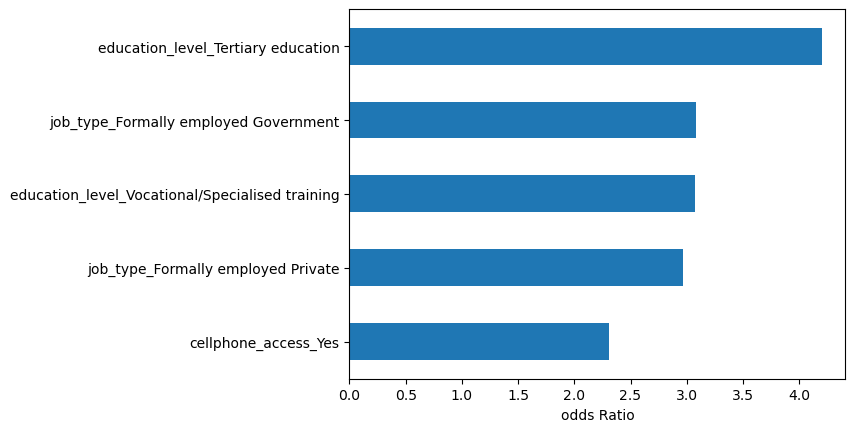

In [89]:
# Horizontal bar chart, five largest coefficients
odds_ratios.tail().plot(kind="barh")
plt.xlabel("odds Ratio");

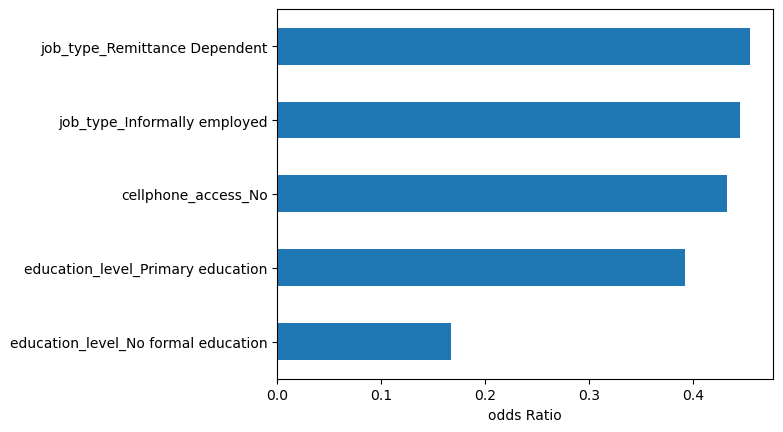

In [90]:
# Horizontal bar chart, five smallest coefficients
odds_ratios.head().plot(kind="barh")
plt.xlabel("odds Ratio");

In [91]:
# Get the predicted result for the test Data
test_bank_account = model.predict(test)

In [92]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test_bank_account})

In [93]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
9295,uniqueid_2212 x Uganda,0
5795,uniqueid_11930 x Rwanda,0
9184,uniqueid_9459 x Tanzania,0
3626,uniqueid_9761 x Rwanda,0
8440,uniqueid_8715 x Tanzania,0


In [95]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)